# Plot Distribution of Samples world-wide
(with Age dots)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp
import matplotlib.colors as cls
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./package/") # Append HAPSBURG
from hapsburg.PackagesSupport.pp_individual_roh_csvs import extract_sub_df_geo_kw

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


In [2]:
def plot_global_map(df, figsize=(18,12), fs=18, c_map="viridis_r", p_range= (0, 12000), 
                    alpha=0.8, s=25, lw=0.3, ec="k", pad=0.1, shrink=0.5, fs_l=12, dpi=200,
                    savepath = "./figures_test/reich_eigenstrat_map.pdf"):
    """Plot global Distribution of Samples.
    df: Dataframe with age column"""

    cmap0 = cm.get_cmap(c_map)
    norm0 = plt.Normalize(p_range[0], vmax=p_range[1])  # Normalize to age BCE
    normc = cls.Normalize(vmin = p_range[0]/1e3, vmax = p_range[1]/1e3) # For the Color Bar
    colors = [cmap0(norm0(i)) for i in df["age"].values]


    fig = plt.figure(figsize=figsize)
    #ax=fig.add_axes([0.1,0.1,0.8,0.8])

    #m = Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=85, 
    #                llcrnrlon=-180,urcrnrlon=180,resolution='c')

    m = Basemap(projection='moll', lat_0=0, lon_0=0)
    #
    m.drawcoastlines()
    #m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,1], fontsize=8)
    #m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], rotation=45, fontsize=8)

    m.drawcoastlines(color='gray', zorder=0)
    m.drawcountries(color="dimgray")
    #m.drawstates()

    plt.title(f"Distribution of n={len(df)} aDNA samples >0.5x worldwide", fontsize=fs)

    m.scatter(df["lon"].values, df["lat"].values, latlon=True, cmap=cmap0, norm=norm0,
              c=df["age"].values, alpha=alpha, s=s, edgecolors=ec, linewidths=lw, zorder=10)

    cb = plt.colorbar(shrink=shrink, pad=pad)
    cb.ax.set_ylabel("Age [ky BP]", rotation=270, fontsize=fs_l, labelpad=10)
    cb.ax.tick_params(labelsize=fs_l)
    if len(savepath)>0:
        fig.savefig(savepath, dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
        print(f"Saved to {savepath}")
    plt.show()

/home/hringbauer/.local/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4786: RuntimeWarning: invalid value encountered in greater
  lonsin = np.where(lonsin > lon_0+180, lonsin-360 ,lonsin)
/home/hringbauer/.local/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4787: RuntimeWarning: invalid value encountered in less
  lonsin = np.where(lonsin < lon_0-180, lonsin+360 ,lonsin)
/home/hringbauer/.local/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4793: RuntimeWarning: invalid value encountered in greater_equal
  itemindex = len(lonsin)-np.where(londiff>=thresh)[0]
/home/hringbauer/.local/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4824: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(lonsin<lon_0-180,lonsin>lon_0+180)
/home/hringbauer/.local/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:4824: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_or(lonsin<lon_0-180,lonsin>

Saved to ./figures_test/global_map.png


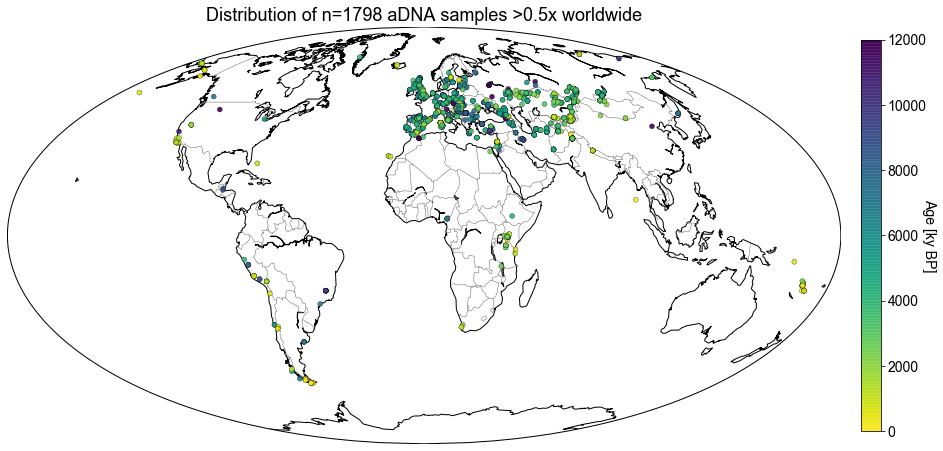

In [13]:
df = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_plot = df[df["age"]>0]
plot_global_map(df_plot, alpha=0.9, figsize=(18,12), pad=0.02, shrink=0.6, dpi=400,
                fs_l=14, savepath="./figures_test/global_map.png")

### Plot Subset

In [23]:
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
df_t = df[df["age"]>0]

#df_t = extract_sub_df_geo_kw(df_t, lat0=-30, lat1=30, lon0=60, lon1=180)
df_t = extract_sub_df_geo_kw(df_t, 40, 60, 100, 115, keywords=["Mongol"])
#df_t = extract_sub_df_geo_kw(df_t, 30, 45, 58, 80)

Found 26 Individuals; 26 from Geography


# Area 51

In [14]:
print("test")

test
